# Задание 1

### Найти данные для задачи классификации или для задачи регрессии (данные не должны повторятся в группе).

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od


od.download('https://www.kaggle.com/datasets/meruvulikith/codeforces-ratings-classification-and-regression')

Skipping, found downloaded files in "./codeforces-ratings-classification-and-regression" (use force=True to force download)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time

# kirillkim71
# 39d1b74c7680ac8e32302e0efa5ae562

In [ ]:
df = pd.read_csv("/content/codeforces-ratings-classification-and-regression/classification_df.csv")
df

,userid,rank-type,contest1,contest2,contest3,contest4,contest5,contest6,contest7,contest8,contest9,contest10
0,3143927301,Candidate Master,2078,2055,2115,2047.0,2024.0,2010.0,1953.0,1936.0,2042.0,2045.0
1,1876577621,Master,2194,2114,2152,2179.0,2211.0,2154.0,2170.0,2141.0,2157.0,2209.0
2,6397741793,Master,2120,2206,2147,2234.0,2294.0,2090.0,2089.0,2072.0,2085.0,2114.0
3,3090123616,Master,2224,2222,2166,2116.0,2029.0,2113.0,2104.0,2096.0,2115.0,2163.0
4,9564162806,Master,2128,2120,2072,2018.0,1963.0,2039.0,1932.0,1963.0,1960.0,1886.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1418,9480350921,Candidate Master,2000,1951,1900,1927.0,1820.0,1787.0,1721.0,1686.0,1681.0,1592.0
1419,7473555183,Candidate Master,1977,1910,1974,1823.0,1796.0,1790.0,1829.0,1717.0,1676.0,1716.0
1420,7812437094,Candidate Master,2066,2098,1888,1788.0,1689.0,1386.0,1111.0,679.0,NaN,NaN
1421,7119479728,Master,2157,2118,1818,1684.0,1387.0,787.0,NaN,NaN,NaN,NaN


In [ ]:
df.head()

,userid,rank-type,contest1,contest2,contest3,contest4,contest5,contest6,contest7,contest8,contest9,contest10
0,3143927301,Candidate Master,2078,2055,2115,2047.0,2024.0,2010.0,1953.0,1936.0,2042.0,2045.0
1,1876577621,Master,2194,2114,2152,2179.0,2211.0,2154.0,2170.0,2141.0,2157.0,2209.0
2,6397741793,Master,2120,2206,2147,2234.0,2294.0,2090.0,2089.0,2072.0,2085.0,2114.0
3,3090123616,Master,2224,2222,2166,2116.0,2029.0,2113.0,2104.0,2096.0,2115.0,2163.0
4,9564162806,Master,2128,2120,2072,2018.0,1963.0,2039.0,1932.0,1963.0,1960.0,1886.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1423 entries, 0 to 1422
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userid     1423 non-null   int64  
 1   rank-type  1423 non-null   object 
 2   contest1   1423 non-null   int64  
 3   contest2   1423 non-null   int64  
 4   contest3   1423 non-null   int64  
 5   contest4   1422 non-null   float64
 6   contest5   1404 non-null   float64
 7   contest6   1374 non-null   float64
 8   contest7   1343 non-null   float64
 9   contest8   1303 non-null   float64
 10  contest9   1279 non-null   float64
 11  contest10  1252 non-null   float64
dtypes: float64(7), int64(4), object(1)
memory usage: 133.5+ KB


In [ ]:
df.isna().sum()

,0
userid,0
rank-type,0
contest1,0
contest2,0
contest3,0
contest4,1
contest5,19
contest6,49
contest7,80
contest8,120


In [ ]:
X = df.drop(['rank-type'], axis=1, errors='ignore')
y_class = df['rank-type']

In [ ]:
X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)

In [ ]:
# Масштабируем признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Задание 2

### Реализовать баггинг.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

start_time = time.time()

rf_class = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42
)
rf_class.fit(X_train_scaled, y_train_class)

RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
# Предсказания
y_pred_class_rf = rf_class.predict(X_test_scaled)

# Время обучения
rf_class_time = time.time() - start_time

# Оценка качества
accuracy_rf = accuracy_score(y_test_class, y_pred_class_rf)
f1_rf = f1_score(y_test_class, y_pred_class_rf, average='macro')

print(f"Random Forest")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"F1-score: {f1_rf:.4f}")
print(f"Time: {rf_class_time:.2f} sec")

Random Forest
Accuracy: 0.9719
F1-score: 0.9505
Time: 1.37 sec


# Задание 3

### Реализовать бустинг на тех же данных, что использовались для баггинга.

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier

start_time = time.time()

cb_class = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    verbose=100,
    devices='0'
)
cb_class.fit(X_train_scaled, y_train_class)

y_pred_class_cb = cb_class.predict(X_test_scaled)

cb_class_time = time.time() - start_time

accuracy_cb = accuracy_score(y_test_class, y_pred_class_cb)
f1_cb = f1_score(y_test_class, y_pred_class_cb, average='macro')

print(f"CatBoost")
print(f"Accuracy: {accuracy_cb:.4f}")
print(f"F1-score: {f1_cb:.4f}")
print(f"Time: {cb_class_time:.2f} sec")

0:	learn: 1.8358721	total: 90.6ms	remaining: 45.2s
100:	learn: 0.0670240	total: 5.19s	remaining: 20.5s
200:	learn: 0.0310474	total: 9.19s	remaining: 13.7s
300:	learn: 0.0188332	total: 12.7s	remaining: 8.37s
400:	learn: 0.0133465	total: 15.9s	remaining: 3.93s
499:	learn: 0.0097088	total: 18.2s	remaining: 0us
CatBoost
Accuracy: 0.9965
F1-score: 0.9961
Time: 18.36 sec


# Задание 4

### Сравнить результаты работы алгоритмов (время работы и качество моделей). Сделать выводы.

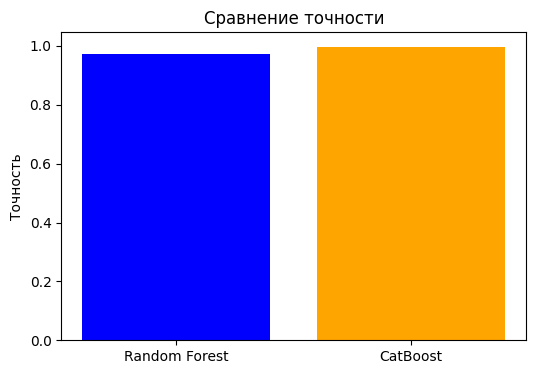

In [ ]:
import matplotlib.pyplot as plt

# График точности для классификации
models_class = ['Random Forest', 'CatBoost']
accuracy_scores = [accuracy_rf, accuracy_cb]

plt.figure(figsize=(6, 4))
plt.bar(models_class, accuracy_scores, color=['blue', 'orange'])
plt.title('Сравнение точности')
plt.ylabel('Точность')
plt.show()